# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, linear_model, metrics, ensemble
import statsmodels.api as sm
import networkx as nx
from networkx.algorithms import bipartite
import scipy

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
DATA_PATH = './data/dataset_final.csv'
df = pd.read_csv(DATA_PATH)

In [3]:
df.describe()

,year,ratings
count,4256.000000,4256.000000
mean,2019.291353,4.963381
std,0.766931,1.492028
min,2018.000000,1.000000
25%,2019.000000,4.000000
50%,2019.000000,5.000000
75%,2020.000000,6.000000
max,2020.000000,9.000000


## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.
2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.
3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.
4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

In [4]:
#1
df['authors_citations'] = df['authors_citations'].str.split(';').apply(lambda x: list(map(int,x)))
df['authors_publications'] = df['authors_publications'].str.split(';').apply(lambda x: list(map(int,x)))
df['authors_hindex'] = df['authors_hindex'].str.split(';').apply(lambda x: list(map(int,x)))

In [5]:
print(f"Number -1 in authors_citations: {sum(df['authors_citations'].apply(lambda x: -1 in x))}")
print(f"Number -1 in authors_publications: {sum(df['authors_publications'].apply(lambda x: -1 in x))}")
print(f"Number -1 in authors_hindex: {sum(df['authors_hindex'].apply(lambda x: -1 in x))}")

Number -1 in authors_citations: 96
Number -1 in authors_publications: 96
Number -1 in authors_hindex: 96


In [6]:
df['authors_citations_median'] = df['authors_citations'].apply(lambda x: np.median(x))
df['authors_publications_median'] = df['authors_publications'].apply(lambda x: np.median(x))
df['authors_hindex_median'] = df['authors_hindex'].apply(lambda x: np.median(x))

In [7]:
#2
df['reputation'] = df.apply(lambda x: np.log10(x['authors_citations'][-1]/x['authors_publications'][-1] + 1), axis=1)

In [8]:
#3
TOP_COMPANY = '|'.join(["Facebook", "Google", "Microsoft", "Deepmind"])
df['has_top_company'] = df['institution'].str.contains(TOP_COMPANY).astype(int)

In [9]:
df['csranking'] = df['csranking'].str.split(';').apply(lambda x: list(map(int,x)))

def is_inbetween(x, min_ = 0, max_ = 10):
    'Return true if values is inbetween 0 and 10, otherwise false'
    
    if (x >= min_) & (x <= 10):
        return True
    else:
        return False

df['has_top_institution'] = df['csranking'].apply(lambda x: any([is_inbetween(i) for i in x])).astype(int)

4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

The normal options to deal with null values (-1) are to drop these values or to impute something for the value. In 1.1.1 we are creating new features that takes the median of a group of values, with some of these values being null. Having a null value for these scores means that we could not find available data. In this case I think it is ok to leave the -1 as in and to pull the median value of the group down should there be a null value. There is only 1 paper whose medians are actually -1 which means they are the only group with a majority of nulls. 

In [10]:
#Team with a -1 value
df[df['authors_hindex_median'] == -1]

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,authors_citations_median,authors_publications_median,authors_hindex_median,reputation,has_top_company,has_top_institution
4238,2020,CNAS: Channel-Level Neural Architecture Search,Heechul Lim;Min-Soo Kim;Jinjun Xiong,2.5,Reject,Gwangju Institute of Science and Technology;Gw...,"[-1, -1, -1]",0,"[-1, -1, 1775]","[-1, -1, 171]","[-1, -1, 23]",False,-1.0,-1.0,-1.0,1.056147,0,0


### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.
2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- Median values for the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).
2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?
3. **From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.
5. Report the $R^2$ (for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

In [11]:
FEATURES = ['authors_hindex_median','authors_publications_median','authors_citations_median','reputation']

In [12]:
#Scenario 1 - Random
def linear_regression(df, features):
    y = df['ratings']
    X = df.drop('ratings',axis=1)
    X = df[features]

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .3, random_state = 1)

    reg_random = linear_model.LinearRegression().fit(X_train,y_train)
    pred = reg_random.predict(X_test)
    r2 = metrics.r2_score(y_test,pred)
    
    return y_test, pred, r2

In [13]:
y_test, pred, r2 = linear_regression(df, FEATURES)
r2

0.08749306772992738

In [14]:
#2
y_ltrain = df[df['year'] <= 2019]['ratings']
y_ltest = df[df['year'] == 2020]['ratings']
X_ltrain = df[df['year'] <= 2019].drop('ratings', axis = 1)
X_ltest = df[df['year'] == 2020].drop('ratings', axis = 1)

X_ltrain = X_ltrain[FEATURES]
X_ltest = X_ltest[FEATURES]

In [15]:
#Scenario 2 - Longitudianl
reg_long = linear_model.LinearRegression().fit(X_ltrain,y_ltrain)
pred_long = reg_long.predict(X_ltest)
metrics.r2_score(y_ltest,pred_long)

-0.2388121312091822

2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?

The formula for $R^2$ = 1 - $\big(\frac{SSR}{TSS}\big)$ = 1 - $\big(\frac{\sum_{}{}e_i^{2}}{\sum_{}{}y_i - \bar{Y}}\big)$

The $R^2$ is the proportion of the variance in the dependent variable that is predictable from the independent variables. We know that a baseline model which always just predicts the mean or $\bar{Y}$ of the data has an R^2 of 0. A model with a negative prediction score has a negative $R^2$.

It already looks like in both cases we have poor .087 and terrible -.239 $R^2$ scores which means that a linear combination of our features does not do a great job of fitting to our data.

For .087 if we look at our formula this is saying our sum of squared error for the residuals is almost as large as the total sum of squared error. Having large errors for residuals is bad as this means our data is far away from our prediction line. We are only doing slightly better than if we just fit a line representing the mean to the data. 

A -.239 means that our residual error is actually larger than the variance. We are actually doing worse than just fitting to the mean of the data. This can happen when our regression line is going opposite of trend in the data and means that our model with these featues and a longitutidinal test set is very poor. 

Interpreting this, clearly historical data on ratings based on these features actually makes us predict worse. 


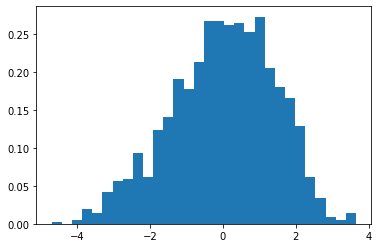

In [16]:
#3
residual = y_test - pred
plt.hist(residual, bins = 30, density = True)
plt.show()

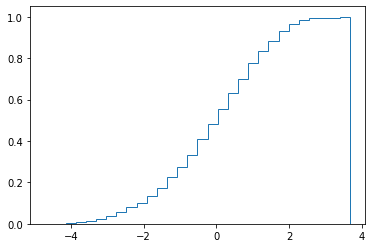

In [17]:
plt.hist(residual, bins = 30, density = True, cumulative = 'True', histtype = 'step')
plt.show()

In [18]:
((residual > 2).sum() + (residual < -2).sum()) / residual.count()

0.15896632732967894

In [19]:
def bootstrap(df, features):

    y = df['ratings']
    X = df.drop('ratings',axis=1)
    X = X[features]

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = .5)
    return X_train, X_test, y_train, y_test

In [20]:
def boostrap_CI(df, features, max_iter = 1000):
    ci = []
    for i in range(max_iter):
        X_train, X_test, y_train, y_test = bootstrap(df, features)
        reg_random = linear_model.LinearRegression().fit(X_train,y_train)
        pred = reg_random.predict(X_test)

        residual = y_test - pred
        ci.append(((residual > 2).sum() + (residual < -2).sum()) / residual.count())
        
    return ci

In [21]:
max_iter = 1000
confidence_interval = boostrap_CI(df, FEATURES, max_iter)

In [22]:
interval = int(.025*max_iter)
confidence_interval = sorted(confidence_interval)
[confidence_interval[interval],confidence_interval[-interval]]

[0.15037593984962405, 0.1724624060150376]

4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.

1) Arvix turn into boolean vs not boolean. This is what

2) Category one hot encode

3) Year as one hot encode. We saw with the longitudinal data it looks like there isn't as much predictivate power from year to year. So would be a good feature to add.

4) Reputation of first author

In [23]:
one_hot = pd.get_dummies(df['arxiv'], prefix = 'arxiv')
df = df.join(one_hot)

In [24]:
one_hot = pd.get_dummies(df['year'], prefix = 'year')
df = df.join(one_hot)

In [25]:
df['reputation_one'] = df.apply(lambda x: np.log10(x['authors_citations'][0]/x['authors_publications'][0] + 1), axis=1)

In [26]:
NEW_FEATURES = ['authors_hindex_median','authors_publications_median',
                'authors_citations_median','reputation','arxiv_False','arxiv_True',
                'year_2018', 'year_2019', 'year_2020', 'reputation_one']

In [27]:
y_test, pred, r2 = linear_regression(df, NEW_FEATURES)
r2

0.21693130004108963

### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:
    - Median values for the number of author citations, publications and h-indexes as calculated in Task 1.1.1.
    - `reputation` of the last author, as calculated in Task 1.1.2.
2. Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.
3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

In [28]:
def gradient_boost_regression(df, features):
    y = df['ratings']
    X = df.drop('ratings',axis=1)
    X = df[features]

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .3, random_state = 1)

    reg_random = ensemble.GradientBoostingRegressor().fit(X_train,y_train)
    pred = reg_random.predict(X_test)
    r2 = metrics.r2_score(y_test,pred)
    
    return y_test, pred, r2

In [29]:
y_test, pred, r2 = gradient_boost_regression(df, FEATURES)
r2

0.10595730907283085

In [30]:
def crazy_feature(x):
    if x >4.96:
        crazy = 9 - x
    else:
        crazy = -x
    return crazy

df['crazy'] = df['ratings'].apply(crazy_feature)

In [31]:
y_test, pred, r2 = gradient_boost_regression(df, ['crazy'])
r2

0.9999900346272116

In [32]:
y_test, pred, r2 = linear_regression(df, ['crazy'])
r2

0.4216318406900581

### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

In [33]:
gb = ensemble.GradientBoostingRegressor()
parameters = {'n_estimators': [50, 75, 100, 150, 200, 250],
              'learning_rate': [.1, .05, .01]}
y = df['ratings']
X = df.drop('ratings',axis=1)
X = df[NEW_FEATURES]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .3, random_state = 1)

clf = model_selection.GridSearchCV(gb, parameters, cv = 20, scoring = 'r2')
clf.fit(X_train,y_train)
best_param = clf.best_params_

In [94]:
clf.cv_results_

{'mean_fit_time': array([0.16001563, 0.25251051, 0.31963168, 0.46552131, 0.60189108,
        0.77389981, 0.15095336, 0.22889067, 0.31298032, 0.4693619 ,
        0.63002748, 0.74189538, 0.15484791, 0.22823111, 0.30415785,
        0.45076221, 0.60698638, 0.71622775]),
 'std_fit_time': array([0.00805996, 0.00808912, 0.01496081, 0.02493819, 0.01875098,
        0.03421957, 0.00557666, 0.01575333, 0.01066255, 0.01563309,
        0.03443967, 0.02769238, 0.00554328, 0.00764388, 0.01049629,
        0.03521798, 0.04827942, 0.02825339]),
 'mean_score_time': array([0.00201054, 0.00237325, 0.00211843, 0.00220482, 0.00217777,
        0.00220804, 0.00193396, 0.00207809, 0.00224396, 0.00215212,
        0.0023549 , 0.00215098, 0.00184985, 0.00192401, 0.00209292,
        0.00221658, 0.00222208, 0.00227102]),
 'std_score_time': array([0.00022865, 0.00041873, 0.00031076, 0.00024942, 0.00027507,
        0.00024416, 0.0002951 , 0.00037639, 0.00032001, 0.00024009,
        0.00038487, 0.00023357, 0.00021523, 

In [90]:
y_train

1577    4.000000
151     6.666667
1032    6.666667
460     5.333333
1988    6.333333
          ...   
2895    1.666667
2763    6.000000
905     6.666667
3980    2.333333
235     6.333333
Name: ratings, Length: 2979, dtype: float64

In [34]:
result = pd.DataFrame(clf.cv_results_)
result = result.iloc[:,result.columns.str.contains('split')]

In [35]:
confidence_interval = []
for i in range(result.shape[0]):
    ci = sorted(result.loc[i,:])
    confidence_interval.append([ci[1],ci[18]])

In [36]:
result.mean(axis = 1)

0     0.202404
1     0.198120
2     0.193272
3     0.183987
4     0.176708
5     0.168984
6     0.201063
7     0.205705
8     0.203891
9     0.200109
10    0.195271
11    0.190528
12    0.111077
13    0.140367
14    0.160355
15    0.183594
16    0.194352
17    0.200247
dtype: float64

In [37]:
confidence_interval

[[0.09307305582617853, 0.2862114689320536],
 [0.09125241712184928, 0.27701918816167304],
 [0.0930853873404558, 0.2719681746854343],
 [0.07277842323517003, 0.26102460035599684],
 [0.07020783417756882, 0.2770644038243123],
 [0.06061314272420293, 0.2711186333740343],
 [0.1022047315691259, 0.27254368982077337],
 [0.09857211166559698, 0.2841243467943312],
 [0.09300908432308341, 0.2825445778465687],
 [0.09082334467606779, 0.27883485152983567],
 [0.08896750954079446, 0.268185577833981],
 [0.0839638345553575, 0.26209820225869707],
 [0.08094627893163941, 0.14627866411925217],
 [0.10114253789787109, 0.1848377548684752],
 [0.10741743693012962, 0.21339323840898317],
 [0.11272383335274083, 0.246128130170717],
 [0.10760410213380911, 0.260852887010911],
 [0.10476411673807973, 0.27301223260640173]]

In [38]:
optimal_reg = ensemble.GradientBoostingRegressor(**best_param).fit(X_train,y_train)

In [39]:
pred = optimal_reg.predict(X_test)
r2 = metrics.r2_score(y_test,pred)
r2

0.2211172367853067

## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.
2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.
3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

In [40]:
accept_2020 = df[(df['year'] == 2020)&(df['decisions'] == 'Accept')]['ratings']
reject_2020 = df[(df['year'] == 2020)&(df['decisions'] == 'Reject')]['ratings']

<AxesSubplot:>

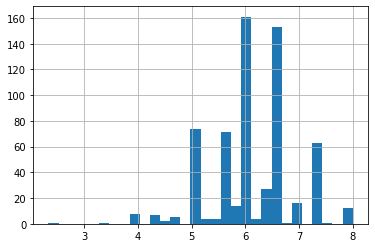

In [41]:
accept_2020.hist(bins = 30)

<AxesSubplot:>

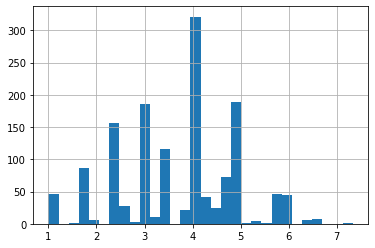

In [42]:
reject_2020.hist(bins = 30)

<AxesSubplot:>

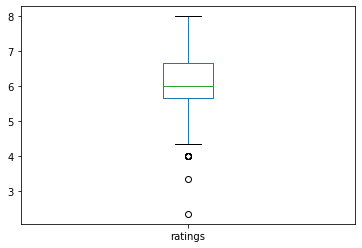

In [43]:
accept_2020.plot.box()

<AxesSubplot:>

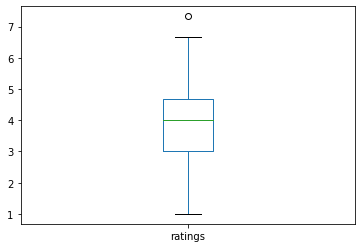

In [44]:
reject_2020.plot.box()

In [45]:
accept_2020.mean()

6.138632750397457

In [46]:
reject_2020.mean()

3.6832747716092755

In [47]:
scipy.stats.ttest_ind(accept_2020, reject_2020)

Ttest_indResult(statistic=45.79777665813106, pvalue=5.21595695e-316)

In [48]:
df.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,...,reputation,has_top_company,has_top_institution,arxiv_False,arxiv_True,year_2018,year_2019,year_2020,reputation_one,crazy
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.000000,Accept,Stanford University;Stanford University;Stanfo...,"[4, 4, 4]",4,"[655, 904, 12908]","[42, 19, 162]",...,1.906761,0,1,0,1,1,0,0,1.219983,0.000000
1,2018,Parametric Information Bottleneck to Optimize ...,Thanh T. Nguyen;Jaesik Choi,4.666667,Reject,Ulsan National Institute of Science and Techno...,"[468, 468]",8,"[1052, 727]","[86, 88]",...,0.966675,0,0,1,0,1,0,0,1.121644,-4.666667
2,2018,Towards Neural Phrase-based Machine Translation,Po-Sen Huang;Chong Wang;Sitao Huang;Dengyong Z...,6.666667,Accept,"Microsoft;Google;University of Illinois, Urban...","[-1, -1, 3, -1, -1]",3;2,"[1718, 17889, 161, 8800, 20766]","[59, 1045, 17, 78, 409]",...,1.714100,1,1,0,1,1,0,0,1.478835,2.333333
3,2018,Interactive Grounded Language Acquisition and ...,Haonan Yu;Haichao Zhang;Wei Xu,6.333333,Accept,Baidu;Baidu;Baidu,"[-1, -1, -1]",6;8,"[890, 1382, 9553]","[37, 63, 557]",...,1.258896,0,0,1,0,1,0,0,1.398878,2.666667
4,2018,A Boo(n) for Evaluating Architecture Performance,Ondrej Bajgar;Rudolf Kadlec;and Jan Kleindienst,4.666667,Reject,;International Business Machines;International...,"[-1, -1, -1]",0,"[366, 678, 658]","[10, 40, 76]",...,0.984882,0,0,1,0,1,0,0,1.575188,-4.666667


### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.56$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.


1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 
2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.


In [49]:
def decisions(x):
    if x == 'Accept':
        return 1
    else:
        return 0

df['decisions'] = df['decisions'].apply(decisions)

In [50]:
df_20 = df[df['year'] == 2020]
X = df_20['ratings']
X = sm.add_constant(X)
y = df_20['decisions']

In [51]:
y

2204    1
2205    1
2206    1
2207    1
2208    1
       ..
4251    0
4252    0
4253    0
4254    0
4255    0
Name: decisions, Length: 2052, dtype: int64

In [52]:
log = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.251882
         Iterations 8


In [53]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2050
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.5913
Time:                        14:53:07   Log-Likelihood:                -516.86
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8811      0.597    -21.574      0.000     -14.051     -11.711
ratings        2.3672      0.110     21.438      0.000       2.151       2.584
==============================================================================
"""

In [54]:
log.predict([1,7])

array([0.97562427])

### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 
2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

In [55]:
df_20['reputation'].describe()

count    2052.000000
mean        1.309256
std         0.551904
min         0.029963
25%         0.929711
50%         1.315103
75%         1.671414
max         3.174548
Name: reputation, dtype: float64

In [56]:
formula = 'decisions ~ ratings + reputation + C(arxiv_True)'
log_2 = sm.Logit.from_formula(formula,data = df_20).fit()

Optimization terminated successfully.
         Current function value: 0.250440
         Iterations 8


In [57]:
log_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2048
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.5936
Time:                        14:53:07   Log-Likelihood:                -513.90
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -13.2261      0.634    -20.873      0.000     -14.468     -11.984
C(arxiv_True)[T.1]     0.2890      0.167      1.727      0.084      -0.039       0.617
ratings                2.3541      0.111     21.296      0.000       2.137       2.571
reputation             0.2267      0.148      1.533      0.125      -0.063       0.517
======================================================================================
"""

In [ ]:
log_2.predict([1,7,1.2,1])

### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.
2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

In [58]:
df_20.head()

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,...,reputation,has_top_company,has_top_institution,arxiv_False,arxiv_True,year_2018,year_2019,year_2020,reputation_one,crazy
2204,2020,Pitfalls of In-Domain Uncertainty Estimation a...,Arsenii Ashukha;Alexander Lyzhov;Dmitry Molcha...,6.666667,1,Samsung;Skolkovo Institute of Science and Tech...,"[-1, -1, -1, 481]",0,"[488, 12, 481, 2097]","[14, 2, 17, 124]",...,1.253127,0,0,1,0,0,0,1,1.554576,2.333333
2205,2020,An Inductive Bias for Distances: Neural Nets t...,Silviu Pitis;Harris Chan;Kiarash Jamali;Jimmy Ba,6.750000,1,"Department of Computer Science, University of ...","[18, 18, 18, 18]",1;10,"[15, 23, 3, 52924]","[9, 13, 3, 56]",...,2.975924,0,0,1,0,0,0,1,0.425969,2.250000
2206,2020,Stochastic AUC Maximization with Deep Neural N...,Mingrui Liu;Zhuoning Yuan;Yiming Ying;Tianbao ...,6.000000,1,University of Iowa;University of Iowa;State Un...,"[154, 154, 266, 154]",9,"[238, 112, 2144, 3236]","[29, 12, 64, 187]",...,1.262565,0,0,0,1,0,0,1,0.964113,3.000000
2207,2020,On the interaction between supervision and sel...,Ryan Lowe*;Abhinav Gupta*;Jakob Foerster;Douwe...,6.666667,1,McGill University;University of Montreal;Faceb...,"[86, 128, -1, -1, 86]",3,"[3343, 36, 2107, 3454, 11328]","[53, 10, 58, 80, 267]",...,1.637759,1,0,1,0,0,0,1,1.806692,2.333333
2208,2020,Towards Better Understanding of Adaptive Gradi...,Mingrui Liu;Youssef Mroueh;Jerret Ross;Wei Zha...,6.000000,1,University of Iowa;International Business Mach...,"[154, -1, -1, -1, -1, -1, 154]",5;9,"[238, 916, 392, 108, 241, 848, 3236]","[29, 53, 12, 46, 30, 86, 187]",...,1.262565,0,0,1,0,0,0,1,0.964113,3.000000


ERROR! Session/line number was not unique in

In [59]:
formula = 'decisions ~ ratings + reputation + C(arxiv_True) + C(has_top_institution) + arxiv_True:has_top_institution'
favor = sm.Logit.from_formula(formula,data = df_20).fit()

 database. History logging moved to new session 209
Optimization terminated successfully.
         Current function value: 0.247320
         Iterations 8


In [60]:
favor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2046
Method:                           MLE   Df Model:                            5
Date:                Tue, 17 Nov 2020   Pseudo R-squ.:                  0.5987
Time:                        14:53:08   Log-Likelihood:                -507.50
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -13.3940      0.647    -20.717      0.000     -14.661     -12.127
C(arxiv_True)[T.1]                 0.1061      0.200      0.529      0.597      -0.287       0.499
C(has_top_institution)[T.1]        0.3662      0.224      1.631      0.103      -0.074       0.806
ratings                            2.3834      0.113     21.171      0.000       2.163       2.604
reputation                         0.1605      0.150      1.072      0.284      -0.133       0.454
arxiv_True:has_top_institution     0.5793      0.370      1.568      0.117      -0.145       1.304
==================================================================================================
"""

## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!
2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the previous classifier that you trained in Step 1?

**Hint:** For a classifier tra we don't need a training set and a test set!


In [61]:
PROP_PATH = './Data/propensity_scores.csv.gz'
propensity_df = pd.read_csv(PROP_PATH, compression = 'gzip')

In [62]:
prop_20 = df_20.merge(propensity_df, on = 'paper')

### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.
2. Report how many pairs did you manage to match? How many didn't you?

In [ ]:
prop_20_not['propensity_score'].describe()

In [64]:
prop_20_arxiv = prop_20[prop_20['arxiv_True'] == 1] 
prop_20_not = prop_20[prop_20['arxiv_True'] == 0]

In [65]:
B = nx.Graph()
B.add_nodes_from(list(prop_20_arxiv.index), bipartite = 0)
B.add_nodes_from(list(prop_20_not.index), bipartite = 1)

In [66]:
graph_arxiv = prop_20_arxiv['propensity_score'].to_dict()
graph_not = prop_20_not['propensity_score'].to_dict()

In [67]:
E = .05
for key,value in graph_arxiv.items():
    for key_2,value_2 in graph_not.items():
        if np.abs(value-value_2) <= E:
            B.add_edge(key, key_2, weight = np.abs(value-value_2))

In [68]:
bipartite.is_bipartite(B)

True

In [124]:
for line in bipartite.generate_edgelist(B):
    print(line)
    break

2 0 {'weight': 0.02616313793038355}


In [70]:
len(prop_20_arxiv)

590

In [71]:
matches = bipartite.minimum_weight_full_matching(B,list(prop_20_arxiv.index))

In [72]:
prop_20_matched = prop_20_arxiv.copy()

In [73]:
prop_20_matched['match'] = prop_20_arxiv.index.map(matches)

In [74]:
prop_20_matched = prop_20_matched.merge(prop_20_not, right_index = True, left_on = 'match', suffixes = ['_treat','_not'])

### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.
2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).
3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

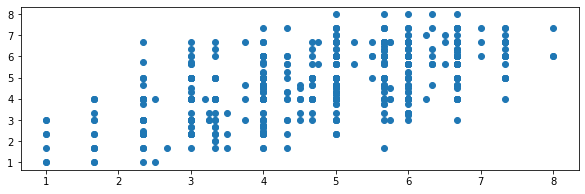

In [75]:
fig, axs = plt.subplots(1,figsize=(10, 3), sharex = True, sharey = True)
axs.scatter(prop_20_matched['ratings_treat'],prop_20_matched['ratings_not'])
plt.show()

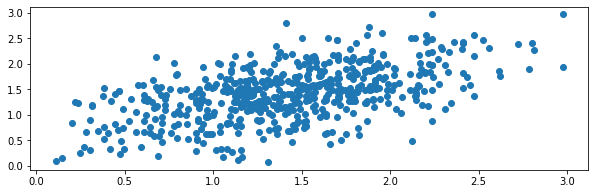

In [76]:
fig, axs = plt.subplots(1,figsize=(10, 3), sharex = True, sharey = True)
axs.scatter(prop_20_matched['reputation_treat'],prop_20_matched['reputation_not'])
plt.show()

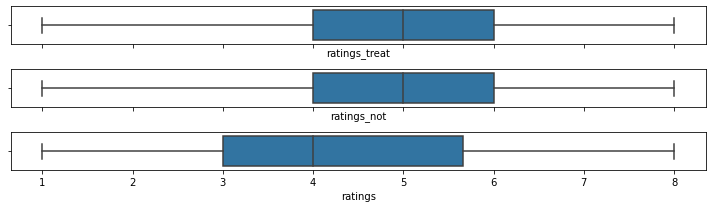

In [77]:
fig, axs = plt.subplots(3,1,figsize=(10, 3), sharex = True, sharey = True)
sns.boxplot(x = prop_20_matched['ratings_treat'], ax = axs[0])
sns.boxplot(x = prop_20_matched['ratings_not'], ax = axs[1])
sns.boxplot(x = prop_20_not['ratings'], ax = axs[2])
plt.tight_layout()
plt.show()

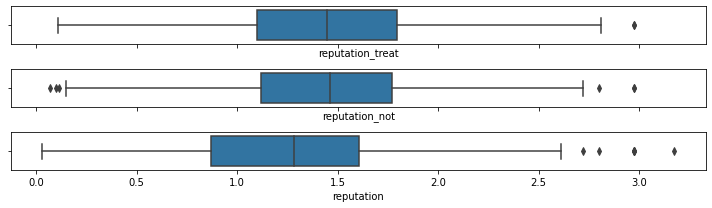

In [78]:
fig, axs = plt.subplots(3,1,figsize=(10, 3), sharex = True, sharey = True)
sns.boxplot(x = prop_20_matched['reputation_treat'], ax = axs[0])
sns.boxplot(x = prop_20_matched['reputation_not'], ax = axs[1])
sns.boxplot(x = prop_20_not['reputation'], ax = axs[2])
plt.tight_layout()
plt.show()

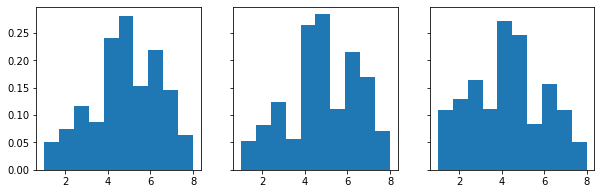

In [95]:
fig, axs = plt.subplots(1,3,figsize=(10, 3), sharex = True, sharey = True)
axs[0].hist(prop_20_matched['ratings_treat'], bins = 10, density = True)
axs[1].hist(prop_20_matched['ratings_not'], bins = 10, density = True)
axs[2].hist(prop_20_not['ratings'], bins = 10, density = True)
plt.show()

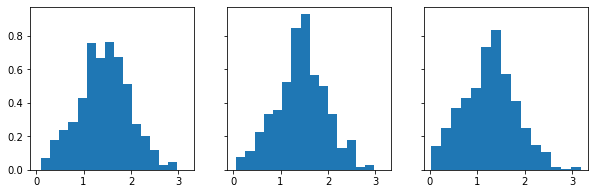

In [80]:
fig, axs = plt.subplots(1,3,figsize=(10, 3), sharex = True, sharey = True)
axs[0].hist(prop_20_matched['reputation_treat'], bins = 15, density = True)
axs[1].hist(prop_20_matched['reputation_not'], bins = 15, density = True)
axs[2].hist(prop_20_not['reputation'], bins = 15, density = True)
plt.show()

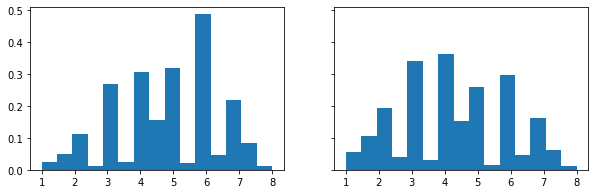

In [81]:
fig, axs = plt.subplots(1,2,figsize=(10, 3), sharex = True, sharey = True)
axs[0].hist(prop_20_matched['ratings_treat'], bins = 15, density = True)
axs[1].hist(prop_20_not['ratings'], bins = 15, density = True)
plt.show()

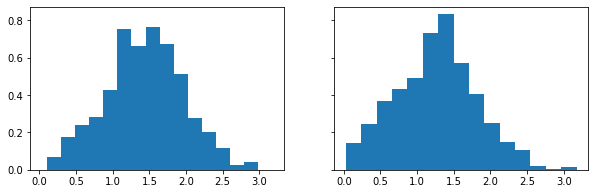

In [82]:
fig, axs = plt.subplots(1,2,figsize=(10, 3), sharex = True, sharey = True)
axs[0].hist(prop_20_matched['reputation_treat'], bins = 15, density = True)
axs[1].hist(prop_20_not['reputation'], bins = 15, density = True)
plt.show()

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


In [83]:
import random

In [113]:
iters = 1
ate = []
for i in range(iters):
    sample = prop_20_matched.sample(frac = 1, replace = False)
    ate.append(np.sum(sample['decisions_treat'] - sample['decisions_not'])/sample.shape[0])

In [114]:
ate

[0.0288135593220339]

In [105]:
sum(sample['decisions_treat'] - sample['decisions_not'])

17

In [116]:
sum(sample['decisions_treat'])

236

In [117]:
sum(sample['decisions_not'])

219

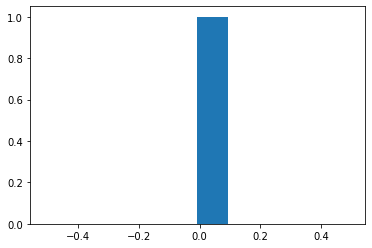

In [98]:
plt.hist(ate)
plt.show()

<AxesSubplot:>

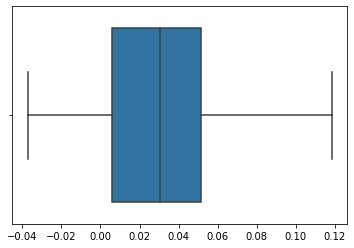

In [86]:
sns.boxplot(x = ate)

### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.
2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

In [87]:
### Your code here! ###